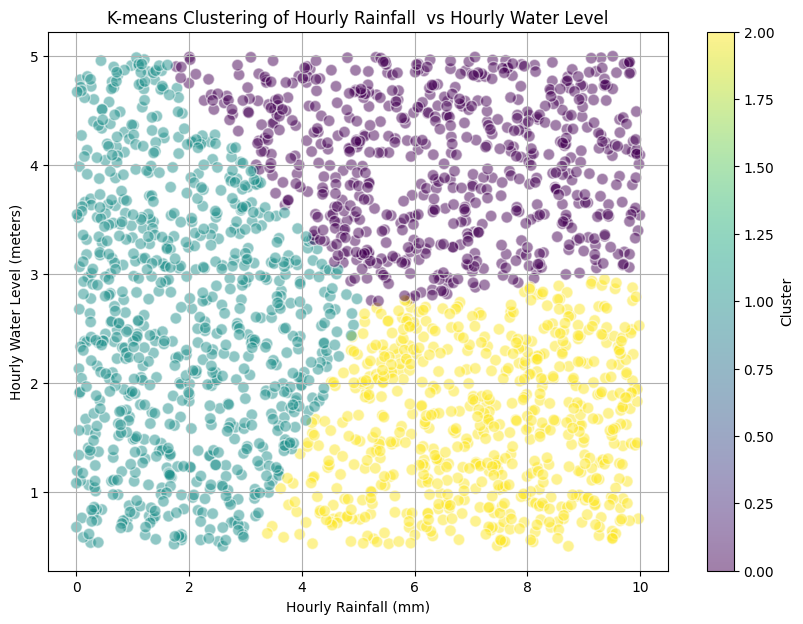

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the data from the provided CSV file
file_path = 'F:/FYP project/FYP(Flood)/Example Datasets/river_water_levels_flooding_hourly_train_data.csv'
df = pd.read_csv(file_path)

# Extract relevant columns
X = df[['Hourly Rainfall (mm)', 'Hourly Water Level (meters)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose the number of clusters (e.g., 3)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 7))
plt.scatter(df['Hourly Rainfall (mm)'], df['Hourly Water Level (meters)'], c=df['Cluster'], cmap='viridis', alpha=0.5, edgecolors='w', s=70)
plt.title('K-means Clustering of Hourly Rainfall  vs Hourly Water Level')
plt.xlabel('Hourly Rainfall (mm)')
plt.ylabel('Hourly Water Level (meters)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the data from the provided CSV file
file_path = 'F:/FYP project/FYP(Flood)/Example Datasets/river_water_levels_flooding_hourly_train_data.csv'
df = pd.read_csv(file_path)

# Extract relevant columns
X = df[['Hourly Rainfall (mm)', 'Hourly Water Level (meters)']]
y = df['Flood Indicator']

# Handle missing data if necessary
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model using Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Add the original features back to the comparison DataFrame
X_test_original = scaler.inverse_transform(X_test)
comparison_df['Hourly Rainfall (mm)'] = X_test_original[:, 0]
comparison_df['Hourly Water Level (meters)'] = X_test_original[:, 1]

# Display the comparison DataFrame
print(comparison_df.head(10))

# Save the comparison DataFrame to a CSV file if needed
comparison_df.to_csv('actual_vs_predicted.csv', index=False)





Confusion Matrix:
[[334   1]
 [  2  83]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       335
           1       0.99      0.98      0.98        85

    accuracy                           0.99       420
   macro avg       0.99      0.99      0.99       420
weighted avg       0.99      0.99      0.99       420


Accuracy Score:
0.9928571428571429
      Actual  Predicted  Hourly Rainfall (mm)  Hourly Water Level (meters)
1034       0          0              2.272696                     3.053259
1176       0          0              3.986630                     2.048412
67         1          1              7.132448                     4.809115
1330       0          0              5.930443                     2.174370
650        0          0              9.144119                     1.109568
1868       0          0              1.366009                     3.664748
986        0          0              6.391199  

C:\Users\Janith\AppData\Local\Temp\ipykernel_5804\1711292055.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)
